In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv


In [2]:
import pandas_profiling
import sys
import math
import numpy.random as nr
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as skpe
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import sklearn.linear_model as lm
from sklearn import tree
from sklearn import neighbors
from sklearn import ensemble

In [3]:
path = "../input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv"
data = pd.read_csv(path,encoding='latin-1')
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


Text(0.5, 1.0, 'All Time Medals of top 15 countries')

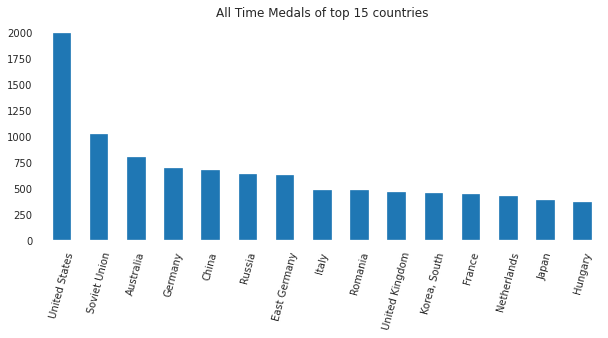

In [4]:
df = data['Country'].value_counts().sort_values(ascending=False)
top_15 = df[:15]
top_15.plot(kind='bar',figsize=(10,4))
plt.xticks(rotation=75)
plt.title('All Time Medals of top 15 countries')

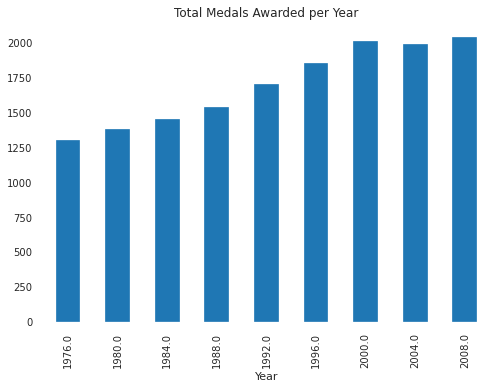

In [5]:
data.groupby('Year').agg('count').plot(y='Medal',kind='bar',legend=False,title='Total Medals Awarded per Year')

Text(0.5, 1.0, 'Medals won by USA per year')

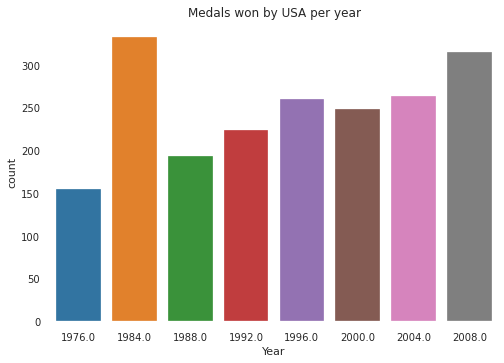

In [6]:
usa = data[data['Country_Code']=='USA']
sns.countplot(x='Year',data=usa)
plt.title("Medals won by USA per year")

Text(0.5, 1.0, 'Type of medals won by USA over the years')

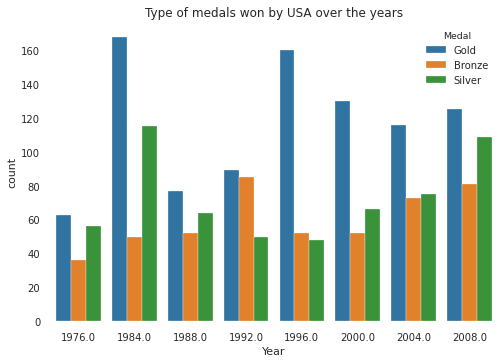

In [7]:
usa = data[data['Country_Code']=='USA']
sns.countplot(x='Year',hue='Medal',data=usa)
plt.title("Type of medals won by USA over the years")

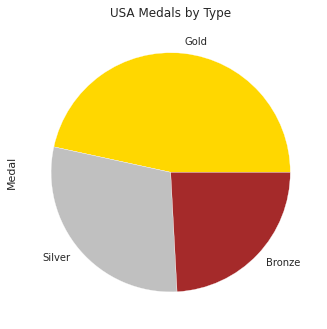

In [8]:
usa_pie = usa['Medal'].value_counts()
usa_pie.plot.pie(colors=('gold','silver','brown'),title='USA Medals by Type')

**USA had won gold as many times as silver and bronze combined**

Text(0.5, 1.0, 'USA Medals by Gender')

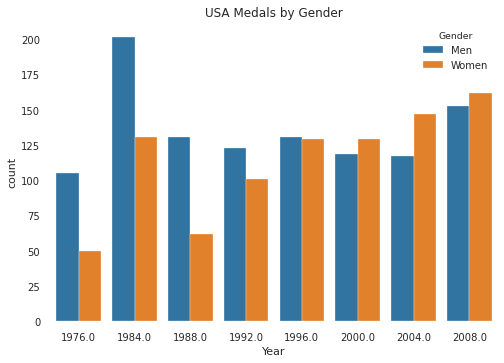

In [9]:
sns.countplot(x='Year',hue='Gender',data=usa)
plt.title('USA Medals by Gender')

Text(0.5, 1.0, 'Total medals by Gender')

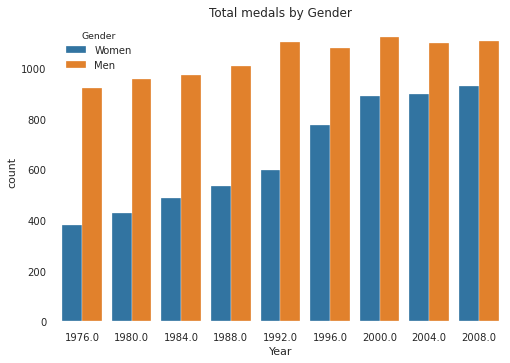

In [10]:
sns.countplot(x='Year',hue='Gender',data=data)
plt.title('Total medals by Gender')

In [11]:
data.Discipline.unique()

array(['Diving', 'Swimming', 'Water polo', 'Archery', 'Athletics',
       'Basketball', 'Boxing', 'Canoe / Kayak F', 'Cycling Road',
       'Cycling Track', 'Dressage', 'Eventing', 'Jumping', 'Fencing',
       'Football', 'Artistic G.', 'Handball', nan, 'Hockey', 'Judo',
       'Modern Pentath.', 'Rowing', 'Sailing', 'Shooting', 'Volleyball',
       'Weightlifting', 'Wrestling Free.', 'Wrestling Gre-R',
       'Synchronized S.', 'Rhythmic G.', 'Table Tennis', 'Tennis',
       'Badminton', 'Baseball', 'Canoe / Kayak S', 'Mountain Bike',
       'Softball', 'Beach volley.', 'Trampoline', 'Taekwondo',
       'Triathlon', 'BMX'], dtype=object)

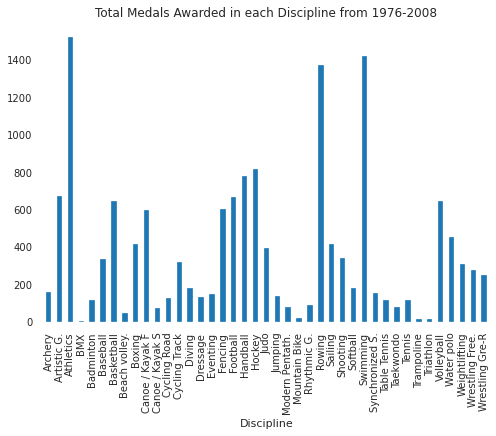

In [12]:
data.groupby('Discipline').agg('count').plot(y='Medal',kind='bar',legend=False,title='Total Medals Awarded in each Discipline from 1976-2008')

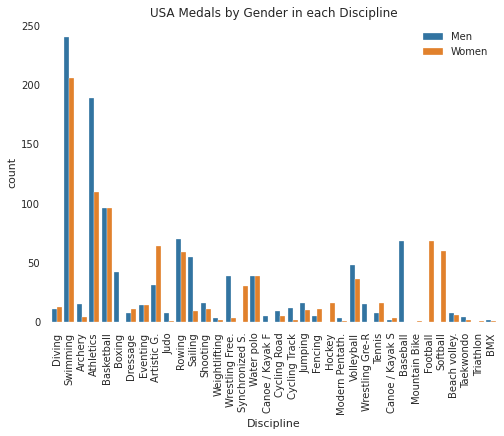

In [13]:
sns.countplot(x='Discipline',hue='Gender',data=usa)
plt.xticks(rotation=90)
plt.title('USA Medals by Gender in each Discipline')
plt.legend(loc=1)  # 1 is code for 'upper right'

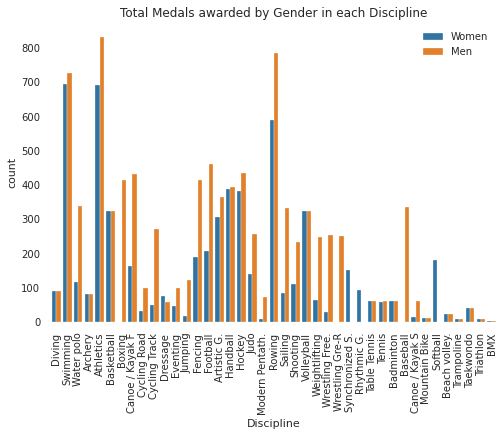

In [14]:
sns.countplot(x='Discipline',hue='Gender',data=data)
plt.xticks(rotation=90)
plt.title('Total Medals awarded by Gender in each Discipline')
plt.legend(loc=1)

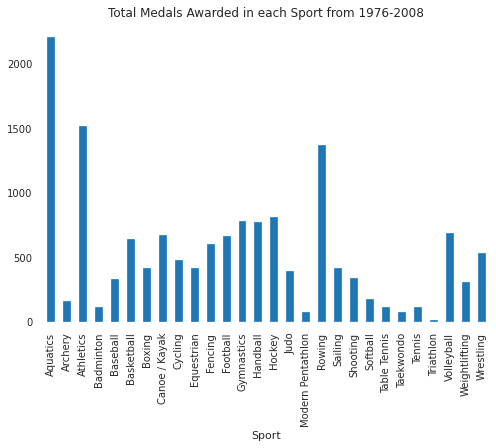

In [15]:
data.groupby('Sport').agg('count').plot(y='Medal',kind='bar',legend=False,title='Total Medals Awarded in each Sport from 1976-2008')

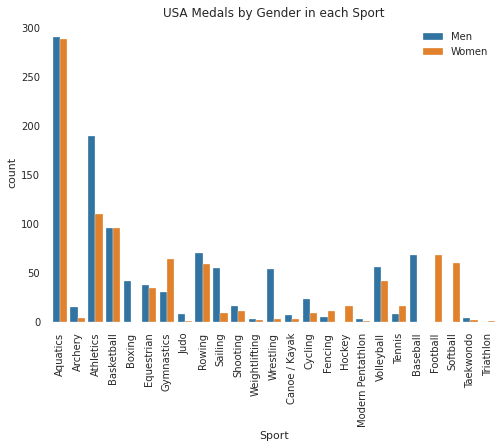

In [16]:
sns.countplot(x='Sport',hue='Gender',data=usa)
plt.xticks(rotation=90)
plt.title('USA Medals by Gender in each Sport')
plt.legend(loc=1) 

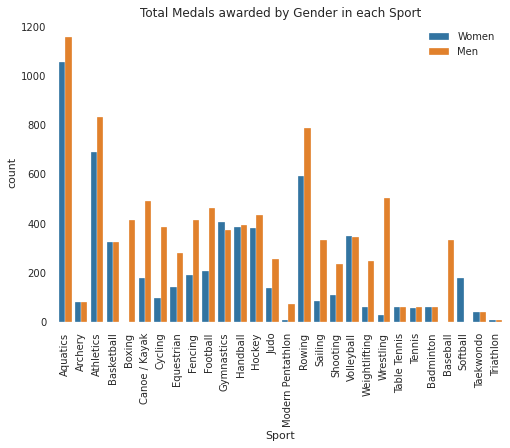

In [17]:
sns.countplot(x='Sport',hue='Gender',data=data)
plt.xticks(rotation=90)
plt.title('Total Medals awarded by Gender in each Sport')
plt.legend(loc=1)